### Text Preprocessing

In [1]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
#File path
df = pd.read_csv('data_supervised (5).csv')
#drop null values
df.dropna(inplace=True)
filename = 'english_words (4).txt'
with open(filename, 'r') as file:
    stop_words = file.read().splitlines()
filename = 'tagalog_stop_words (5).txt'
with open(filename, 'r') as file:
    tagalog_words = file.read().splitlines()
stop_words.extend(tagalog_words)
def preprocess_data(article):
    stopwords=stop_words
    article = str(article).lower()
    article = re.sub("[^a-zA-Z0-9\s]",'',article)
    temp_final =[]
    for word in article.split():
        if word =='' or '\r\n' in word or word in stop_words:
            None
        else:
            temp_final.append(word)
    return word_tokenize(' '.join(temp_final))
df['Article'] = df['Article'].apply(preprocess_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#Check first 5 instances
df.head()

,Article,Category
0,"[manila, philippines, bad, morning, sumalubong...",Metro
1,"[kabilang, bagong, panuntunan, operational, pr...",Bansa
2,"[ibinulong, nang, asset, kuwago, ora, private,...",Opinyon
3,"[manila, philippines, iniulat, nasawi, pasay, ...",Metro
4,"[biruin, mo, nagamit, rin, niangelika, dela, c...",Showbiz


In [3]:
df['Category'].value_counts()

Bansa         999
Probinsiya    998
Opinyon       996
Showbiz       996
Metro         995
Palaro        995
Name: Category, dtype: int64

In [4]:
#Importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
#Creating a CountVectorizer model
bow_transformer= CountVectorizer(analyzer=preprocess_data).fit(df['Article'])

In [6]:
#Print number of vocabulary/words
print(len(bow_transformer.vocabulary_))

66779


In [7]:
#Transform whole article to bag of words
article_bow=bow_transformer.transform(df['Article'])

In [8]:
#Import TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
#Making an instance of this transformer
tfidf_transformer=TfidfTransformer().fit(article_bow)

In [9]:
#Convert the entire bag of words corpus into a tfidf corpus at once
article_tfidf=tfidf_transformer.transform(article_bow)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#train test split to 75%
article_train,article_test,category_train,category_test=train_test_split(df['Article'],df['Category'],test_size=0.25)

## SVM

In [12]:
from sklearn.pipeline import Pipeline
#lets import SVM
from sklearn.linear_model import SGDClassifier

In [13]:
#think of the pipeline as the steps or methods on a task
text_clf_svm = Pipeline([('vect', CountVectorizer(analyzer=preprocess_data)),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier()),
 ])

In [14]:
_=text_clf_svm.fit(article_train,category_train)

In [15]:
from sklearn.metrics import classification_report
#predict the test article
prediction=text_clf_svm.predict(article_test)

In [16]:
# Generate a classification report
report = classification_report(category_test, prediction)

In [17]:
print(report)

              precision    recall  f1-score   support

       Bansa       0.86      0.82      0.84       259
       Metro       0.87      0.95      0.90       241
     Opinyon       0.97      0.93      0.95       251
      Palaro       0.99      0.99      0.99       234
  Probinsiya       0.94      0.94      0.94       265
     Showbiz       0.97      0.98      0.97       245

    accuracy                           0.93      1495
   macro avg       0.93      0.93      0.93      1495
weighted avg       0.93      0.93      0.93      1495



In [18]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(category_test, prediction)
print(cm)

[[213  28   2   1  14   1]
 [  8 228   2   0   2   1]
 [ 11   2 234   0   0   4]
 [  2   0   0 231   0   1]
 [ 10   5   0   0 250   0]
 [  3   0   2   1   0 239]]


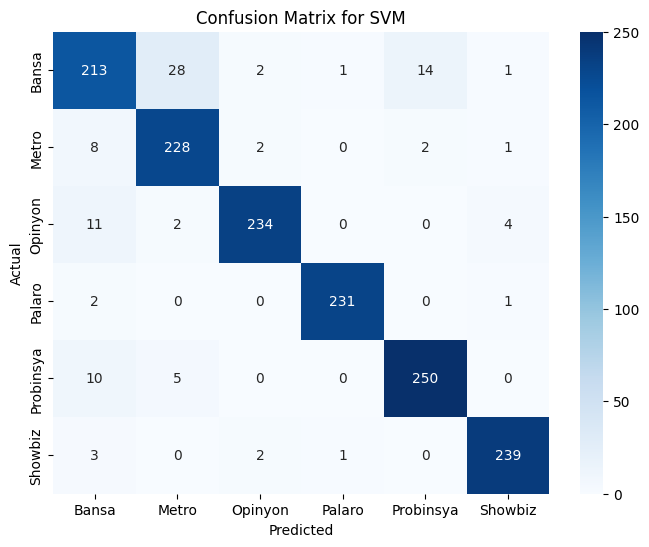

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'],  # Replace with your class labels
            yticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'])  # Replace with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

## Naive Bayes

In [21]:
from sklearn.pipeline import Pipeline
#lets import SVM
from sklearn.naive_bayes import MultinomialNB

In [22]:
#think of the pipeline as the steps or methods on a task
text_clf_nb = Pipeline([('vect', CountVectorizer(analyzer=preprocess_data)),
                      ('tfidf', TfidfTransformer()),
                      ('clf-nb', MultinomialNB()),
 ])

In [23]:
_=text_clf_nb.fit(article_train,category_train)

In [24]:
#predict the test article
prediction=text_clf_nb.predict(article_test)

In [25]:
# Generate a classification report
report = classification_report(category_test, prediction)

In [26]:
print(report)

              precision    recall  f1-score   support

       Bansa       0.80      0.76      0.78       259
       Metro       0.79      0.93      0.85       241
     Opinyon       0.93      0.86      0.89       251
      Palaro       0.99      0.99      0.99       234
  Probinsiya       0.95      0.91      0.93       265
     Showbiz       0.98      0.98      0.98       245

    accuracy                           0.90      1495
   macro avg       0.91      0.90      0.90      1495
weighted avg       0.91      0.90      0.90      1495



In [27]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(category_test, prediction)
print(cm)

[[198  41  11   1   8   0]
 [ 10 224   2   0   3   2]
 [ 25   7 215   0   1   3]
 [  2   0   0 231   0   1]
 [ 11  11   1   0 242   0]
 [  2   1   1   2   0 239]]


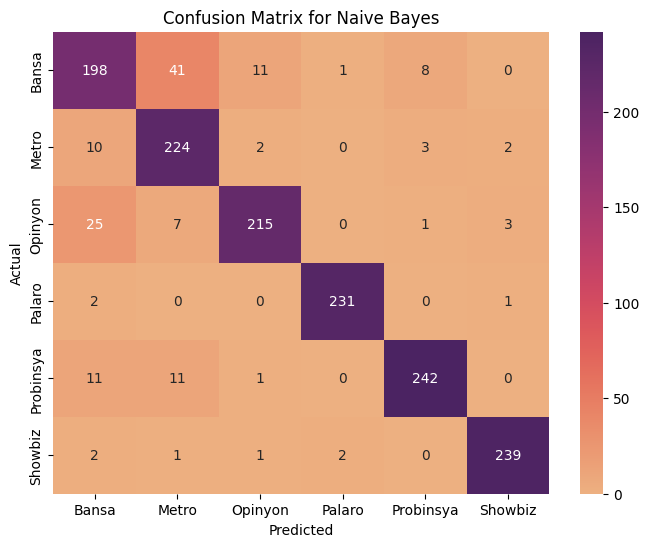

In [28]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare",
            xticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'],  # Replace with your class labels
            yticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'])  # Replace with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

## KNN

In [29]:
#import KNN
from sklearn.neighbors import KNeighborsClassifier

In [30]:
k = 3  # The number of neighbors to consider
#think of the pipeline as the steps or methods on a task
text_clf_knn = Pipeline([('vect', CountVectorizer(analyzer=preprocess_data)),
                      ('tfidf', TfidfTransformer()),
                      ('clf-knn', KNeighborsClassifier(n_neighbors = k)),
 ])

In [31]:
_=text_clf_knn.fit(article_train,category_train)

In [32]:
#predict the test article
prediction=text_clf_knn.predict(article_test)

In [33]:
# Generate a classification report
report = classification_report(category_test, prediction)

In [34]:
print(report)

              precision    recall  f1-score   support

       Bansa       0.67      0.71      0.69       259
       Metro       0.71      0.88      0.78       241
     Opinyon       0.81      0.70      0.75       251
      Palaro       0.99      0.98      0.99       234
  Probinsiya       0.92      0.83      0.87       265
     Showbiz       0.97      0.93      0.95       245

    accuracy                           0.84      1495
   macro avg       0.85      0.84      0.84      1495
weighted avg       0.84      0.84      0.84      1495



In [35]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(category_test, prediction)
print(cm)

[[184  35  27   2  10   1]
 [ 21 211   5   0   3   1]
 [ 46  20 176   0   4   5]
 [  2   1   1 230   0   0]
 [ 16  27   2   0 220   0]
 [  4   4   6   1   1 229]]


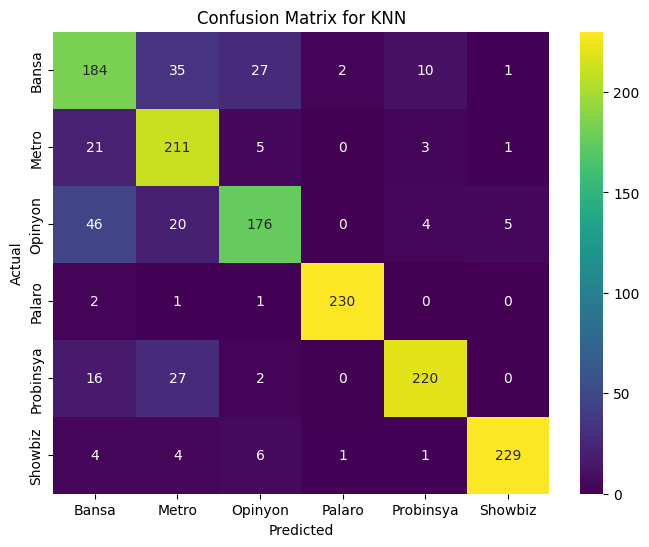

In [36]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
            xticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'],  # Replace with your class labels
            yticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'])  # Replace with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
#think of the pipeline as the steps or methods on a task
text_clf_dtc = Pipeline([('vect', CountVectorizer(analyzer=preprocess_data)),
                      ('tfidf', TfidfTransformer()),
                      ('clf-dtc', DecisionTreeClassifier()),
 ])

In [39]:
_=text_clf_dtc.fit(article_train,category_train)

In [40]:
#predict the test article
prediction=text_clf_dtc.predict(article_test)

In [41]:
# Generate a classification report
report = classification_report(category_test, prediction)

In [42]:
print(report)

              precision    recall  f1-score   support

       Bansa       0.74      0.68      0.71       259
       Metro       0.74      0.93      0.82       241
     Opinyon       0.82      0.90      0.86       251
      Palaro       0.93      0.88      0.91       234
  Probinsiya       0.93      0.83      0.88       265
     Showbiz       0.85      0.77      0.81       245

    accuracy                           0.83      1495
   macro avg       0.84      0.83      0.83      1495
weighted avg       0.84      0.83      0.83      1495



In [43]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(category_test, prediction)
print(cm)

[[175  55   7   3  12   7]
 [ 10 223   2   2   3   1]
 [  2   2 227   3   0  17]
 [  9   3   7 207   0   8]
 [ 25  16   2   0 221   1]
 [ 16   1  31   7   1 189]]


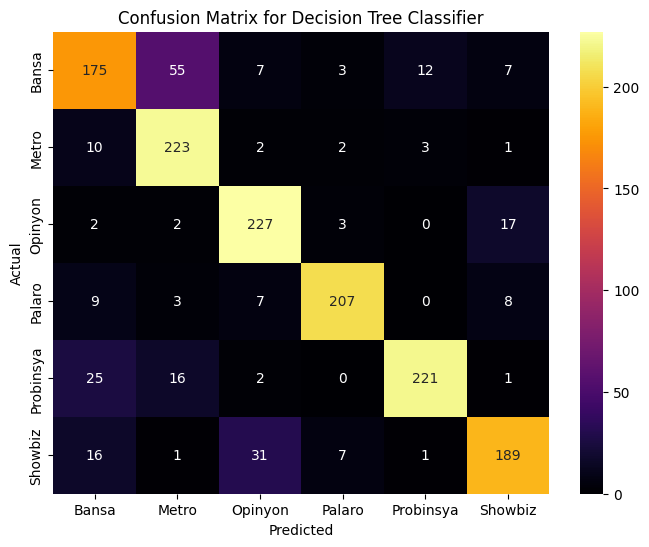

In [44]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="inferno",
            xticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'],  # Replace with your class labels
            yticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'])  # Replace with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
#think of the pipeline as the steps or methods on a task
text_clf_lr = Pipeline([('vect', CountVectorizer(analyzer=preprocess_data)),
                      ('tfidf', TfidfTransformer()),
                      ('clf-lr', LogisticRegression()),
 ])

In [47]:
_=text_clf_lr.fit(article_train,category_train)

In [48]:
#predict the test article
prediction=text_clf_lr.predict(article_test)

In [49]:
# Generate a classification report
report = classification_report(category_test, prediction)

In [50]:
print(report)

              precision    recall  f1-score   support

       Bansa       0.81      0.85      0.82       259
       Metro       0.84      0.92      0.88       241
     Opinyon       0.97      0.88      0.92       251
      Palaro       0.98      0.98      0.98       234
  Probinsiya       0.96      0.92      0.94       265
     Showbiz       0.97      0.97      0.97       245

    accuracy                           0.92      1495
   macro avg       0.92      0.92      0.92      1495
weighted avg       0.92      0.92      0.92      1495



In [51]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(category_test, prediction)
print(cm)

[[219  27   3   2   7   1]
 [ 13 222   2   0   3   1]
 [ 21   6 220   0   0   4]
 [  2   0   1 230   0   1]
 [ 13   7   0   0 245   0]
 [  4   1   1   2   0 237]]


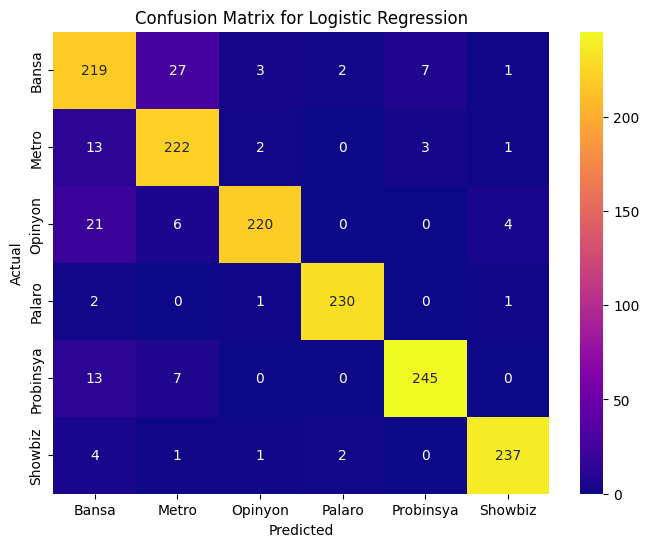

In [52]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma",
            xticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'],  # Replace with your class labels
            yticklabels=['Bansa', 'Metro', 'Opinyon', 'Palaro','Probinsya', 'Showbiz'])  # Replace with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()